### Appendix

# Angle stacks

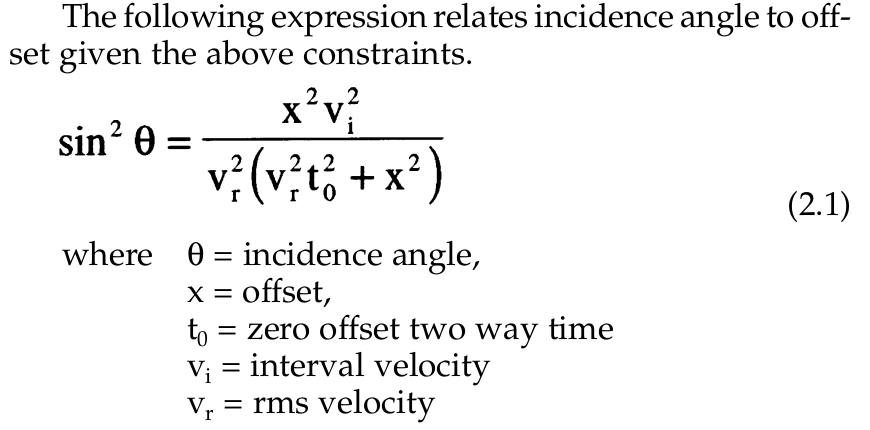

In [1]:
from IPython.display import Image
Image('./equation_2.1.png')

In [3]:
from welly import Well

w = Well.from_las('./R-39.las')

In [4]:
dtp = w.data['DT4P']
rho = w.data['RHOB']
dts = w.data['DT4S']
depth = dtp.basis

vp = 1e6 / dtp
vs = 1e6 / dts

Since we don't have stacking velocities, we can compute $V_\mathrm{rms}$ from `vp` and just make up offset `x`. However, the `t0` log will have to be the same length as `vp`. These times are completely made up: clearly, we will normally have computed the time basis.

In [14]:
import bruges
import numpy as np

vr = bruges.transform.v_rms(vp, depth)
x = np.linspace(0, 3000, 3001).reshape(-1, 1)
t0 = np.linspace(0, 3, vp.size)

In [16]:
theta = np.arcsin(x**2 * vp**2 / (vr**2 * (vr**2 * t0**2 + x**2)))

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


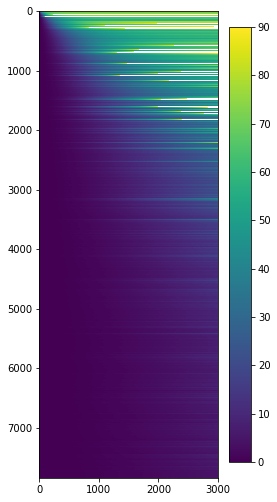

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(4,10))
plt.imshow(np.degrees(theta.T))
plt.colorbar(shrink=0.8)
plt.show()